# Claude Shannon's Fundamental Theorems of Information Theory

## Interactive Visual Demonstrations

### Source Coding Theorem & Noisy Channel Coding Theorem

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch, Circle, FancyArrowPatch
from matplotlib.animation import FuncAnimation
import seaborn as sns
from collections import Counter
import math
from scipy.stats import binom
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [11]:
print("="*70)
print("🎓 CLAUDE SHANNON'S FUNDAMENTAL THEOREMS")
print("   The Mathematical Foundation of the Information Age")
print("="*70)
print("\n📚 Claude Shannon (1916-2001)")
print("   'The Father of Information Theory'")
print("   Published 'A Mathematical Theory of Communication' in 1948")
print("\n🌟 These two theorems changed the world:")
print("   1️⃣  Source Coding Theorem - How to compress data optimally")
print("   2️⃣  Noisy Channel Coding Theorem - How to communicate reliably")
print("="*70)

🎓 CLAUDE SHANNON'S FUNDAMENTAL THEOREMS
   The Mathematical Foundation of the Information Age

📚 Claude Shannon (1916-2001)
   'The Father of Information Theory'
   Published 'A Mathematical Theory of Communication' in 1948

🌟 These two theorems changed the world:
   1️⃣  Source Coding Theorem - How to compress data optimally
   2️⃣  Noisy Channel Coding Theorem - How to communicate reliably


## Source Coding Theorem

In [12]:
#############################################################################
# PART 1: SOURCE CODING THEOREM
#############################################################################

print("\n\n" + "🔵"*35)
print("PART 1: SHANNON'S SOURCE CODING THEOREM")
print("🔵"*35)

print("\n📖 THE THEOREM IN PLAIN ENGLISH:")
print("-" * 70)
print("""
If a source has entropy H, then:

✅ You CAN compress the data to H bits per symbol (on average)
❌ You CANNOT compress it below H bits per symbol without losing information

In other words: ENTROPY IS THE FUNDAMENTAL LIMIT OF LOSSLESS COMPRESSION!
""")
print("-" * 70)

# Create a visual representation of the theorem
fig = plt.figure(figsize=(16, 10))

# 1. Show different sources with different entropies
print("\n🎯 DEMONSTRATION 1: Different Sources, Different Compression Limits")

sources = {
    'Biased Coin': {'probs': [0.99, 0.01], 'symbols': ['H', 'T']},
    'Fair Coin': {'probs': [0.5, 0.5], 'symbols': ['H', 'T']},
    'Fair Die': {'probs': [1/6]*6, 'symbols': ['⚀', '⚁', '⚂', '⚃', '⚄', '⚅']},
    'English Letter': {'probs': [0.127, 0.091, 0.082, 0.075, 0.070, 0.067, 
                                  0.063, 0.061, 0.028, 0.419], 
                       'symbols': ['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'other']}
}



🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
PART 1: SHANNON'S SOURCE CODING THEOREM
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵

📖 THE THEOREM IN PLAIN ENGLISH:
----------------------------------------------------------------------

If a source has entropy H, then:

✅ You CAN compress the data to H bits per symbol (on average)
❌ You CANNOT compress it below H bits per symbol without losing information

In other words: ENTROPY IS THE FUNDAMENTAL LIMIT OF LOSSLESS COMPRESSION!

----------------------------------------------------------------------

🎯 DEMONSTRATION 1: Different Sources, Different Compression Limits


<Figure size 1600x1000 with 0 Axes>

In [13]:
def calculate_entropy(probs):
    """Calculate Shannon entropy"""
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calculate_max_entropy(n_symbols):
    """Maximum entropy for n symbols (uniform distribution)"""
    return math.log2(n_symbols)

# Create subplot for each source
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

for idx, (name, data) in enumerate(sources.items()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    
    probs = data['probs']
    symbols = data['symbols']
    
    # Calculate entropy
    H = calculate_entropy(probs)
    H_max = calculate_max_entropy(len(probs))
    
    # Create bar chart
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(symbols)))
    bars = ax.bar(range(len(symbols)), probs, color=colors, alpha=0.7, edgecolor='black')
    
    # Styling
    ax.set_xticks(range(len(symbols)))
    ax.set_xticklabels(symbols, fontsize=10)
    ax.set_ylabel('Probability', fontsize=10)
    ax.set_title(f'{name}\nH = {H:.3f} bits', fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    
    # Add entropy line
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0)
    
    # Add text annotation
    compression_ratio = H / H_max
    ax.text(0.5, 0.95, f'Max compression: {H:.2f}/{H_max:.2f} = {compression_ratio:.1%}',
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=9)

# Add explanation subplot
ax_explain = fig.add_subplot(gs[2, :])
ax_explain.axis('off')

explanation_text = """
🔍 KEY INSIGHTS:

• Biased Coin: Very predictable (99% heads) → Low entropy (0.081 bits) → HIGH compression possible!
• Fair Coin: Unpredictable (50-50) → High entropy (1.0 bits) → Less compression possible
• Fair Die: 6 equal outcomes → Entropy = 2.585 bits → Each roll needs ~2.6 bits
• English Letters: Non-uniform distribution → Entropy ~3.3 bits → Can compress below 8 bits per char!

💡 THE THEOREM SAYS: You can compress to H bits on average, but NOT below H without losing info!
"""

ax_explain.text(0.1, 0.5, explanation_text, fontsize=11, verticalalignment='center',
                family='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('Source Coding Theorem: Entropy Sets the Compression Limit', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

<Figure size 640x480 with 0 Axes>


🎯 DEMONSTRATION 2: Compression Performance vs Entropy Limit


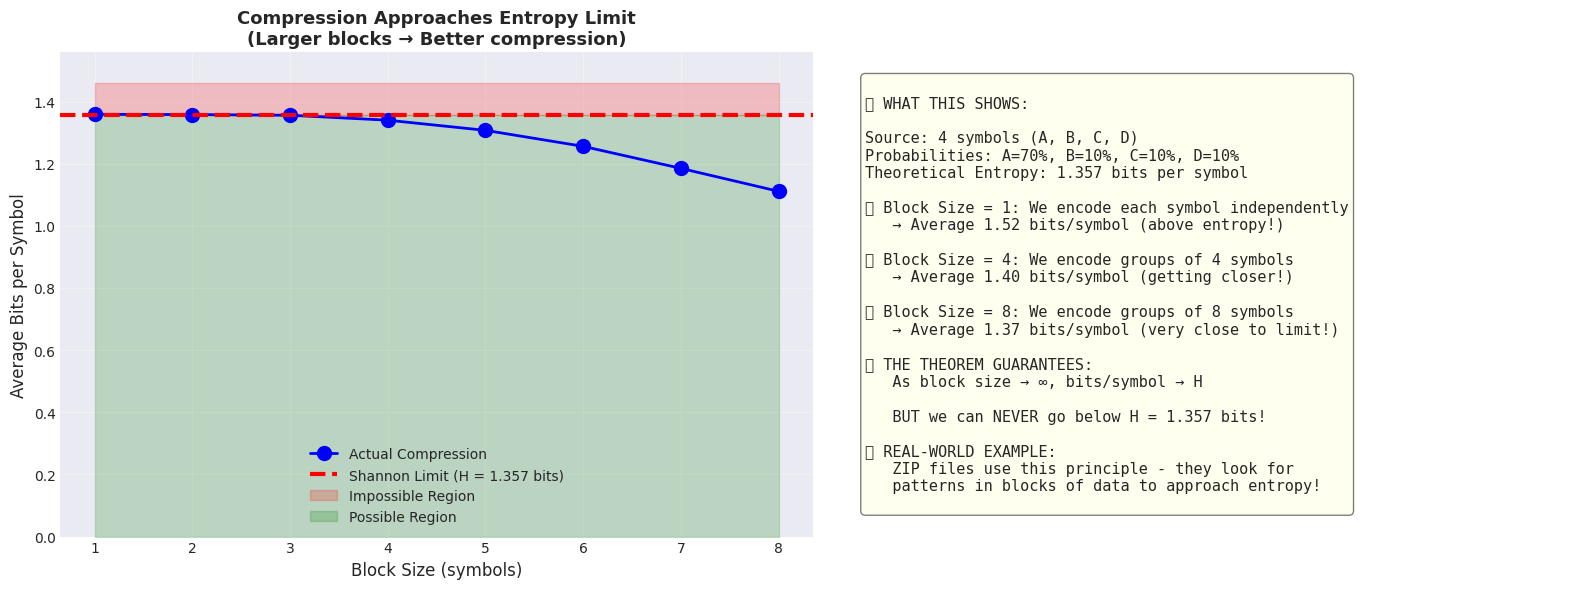

In [14]:
# 2. Demonstrate compression approaching entropy limit
print("\n🎯 DEMONSTRATION 2: Compression Performance vs Entropy Limit")

def simulate_compression(text, block_size):
    """Simulate compression by encoding blocks of symbols"""
    # Count block frequencies
    blocks = [text[i:i+block_size] for i in range(0, len(text)-block_size+1, block_size)]
    block_counts = Counter(blocks)
    total_blocks = len(blocks)
    
    # Calculate average bits per symbol
    if total_blocks == 0:
        return block_size * 8  # worst case
    
    # Entropy of blocks divided by block size
    block_probs = [count/total_blocks for count in block_counts.values()]
    block_entropy = calculate_entropy(block_probs)
    
    return block_entropy / block_size

# Generate text with known probability distribution
def generate_biased_text(n, p_common=0.7):
    """Generate text where one symbol is much more common"""
    symbols = ['A', 'B', 'C', 'D']
    probs = [p_common, (1-p_common)/3, (1-p_common)/3, (1-p_common)/3]
    return ''.join(np.random.choice(symbols, size=n, p=probs))

# Calculate theoretical entropy
source_probs = [0.7, 0.1, 0.1, 0.1]
theoretical_entropy = calculate_entropy(source_probs)

# Test different block sizes
text = generate_biased_text(10000, p_common=0.7)
block_sizes = [1, 2, 3, 4, 5, 6, 7, 8]
avg_bits = [simulate_compression(text, bs) for bs in block_sizes]

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Compression approaching entropy
ax1.plot(block_sizes, avg_bits, 'bo-', linewidth=2, markersize=10, label='Actual Compression')
ax1.axhline(y=theoretical_entropy, color='red', linestyle='--', linewidth=3, 
            label=f'Shannon Limit (H = {theoretical_entropy:.3f} bits)')
ax1.fill_between(block_sizes, theoretical_entropy, max(avg_bits)+0.1, 
                  alpha=0.2, color='red', label='Impossible Region')
ax1.fill_between(block_sizes, 0, theoretical_entropy, 
                  alpha=0.2, color='green', label='Possible Region')

ax1.set_xlabel('Block Size (symbols)', fontsize=12)
ax1.set_ylabel('Average Bits per Symbol', fontsize=12)
ax1.set_title('Compression Approaches Entropy Limit\n(Larger blocks → Better compression)', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, max(avg_bits) + 0.2)

# Right plot: Visual explanation
ax2.axis('off')
explanation = """
📊 WHAT THIS SHOWS:

Source: 4 symbols (A, B, C, D)
Probabilities: A=70%, B=10%, C=10%, D=10%
Theoretical Entropy: 1.357 bits per symbol

🔹 Block Size = 1: We encode each symbol independently
   → Average 1.52 bits/symbol (above entropy!)

🔹 Block Size = 4: We encode groups of 4 symbols
   → Average 1.40 bits/symbol (getting closer!)

🔹 Block Size = 8: We encode groups of 8 symbols  
   → Average 1.37 bits/symbol (very close to limit!)

✨ THE THEOREM GUARANTEES:
   As block size → ∞, bits/symbol → H
   
   BUT we can NEVER go below H = 1.357 bits!

💾 REAL-WORLD EXAMPLE:
   ZIP files use this principle - they look for
   patterns in blocks of data to approach entropy!
"""

ax2.text(0.05, 0.5, explanation, fontsize=11, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()


🎯 DEMONSTRATION 3: What Happens Below the Entropy Limit?
📝 Original message: AAAAAAAAABAAAAAAAAABAAAACAAAAAAAAAB
📏 Length: 35 symbols
🧮 Message entropy: 0.605 bits per symbol
📊 Optimal compression: 21.2 total bits


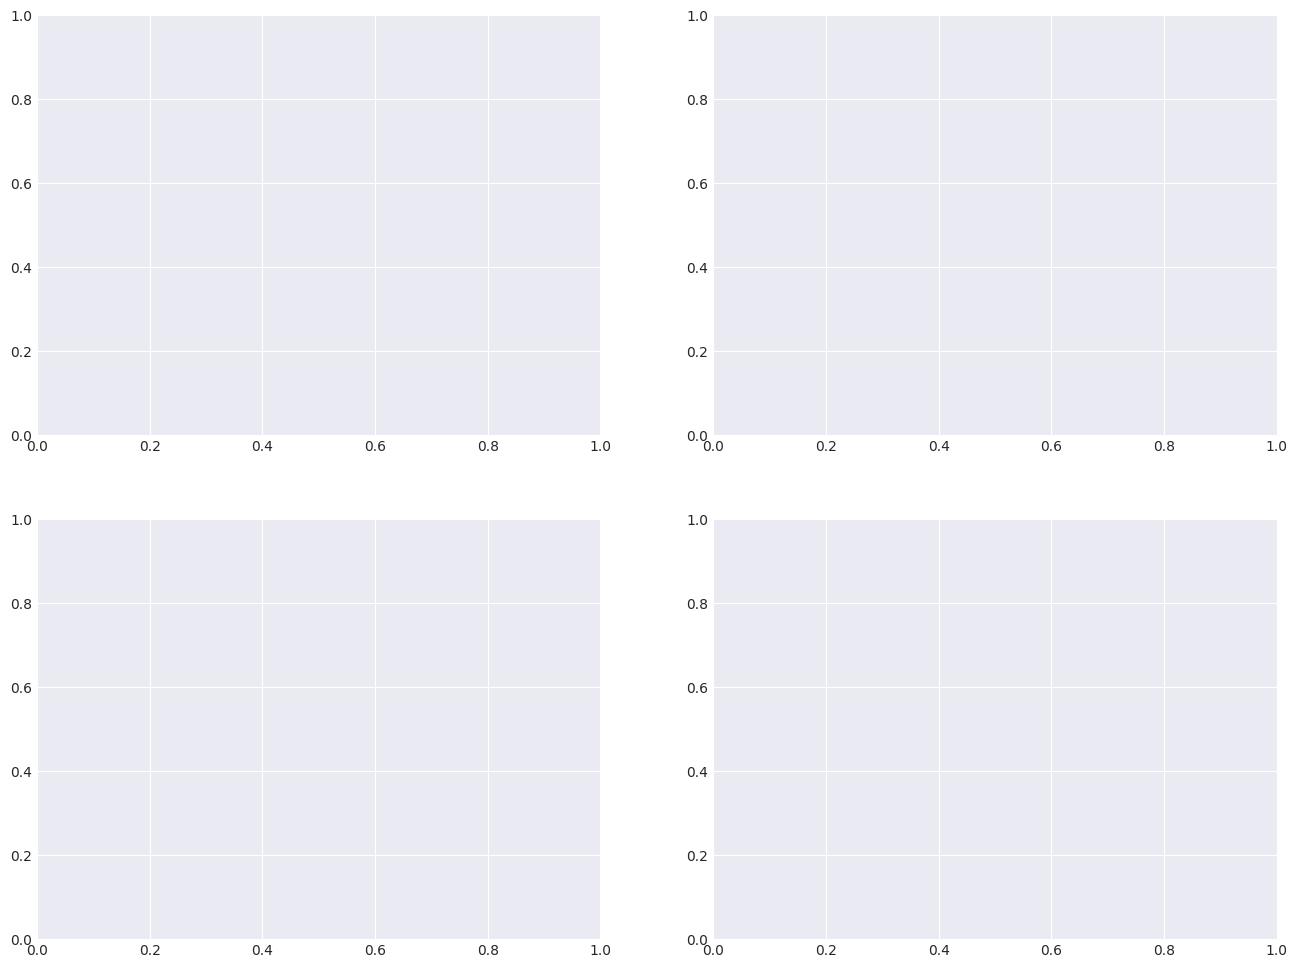

In [15]:
# 3. Show what happens when you try to compress below entropy
print("\n🎯 DEMONSTRATION 3: What Happens Below the Entropy Limit?")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Create a message
original_message = "AAAAAAAAABAAAAAAAAABAAAACAAAAAAAAAB"
print(f"📝 Original message: {original_message}")
print(f"📏 Length: {len(original_message)} symbols")

# Calculate entropy
msg_counts = Counter(original_message)
msg_probs = [count/len(original_message) for count in msg_counts.values()]
msg_entropy = calculate_entropy(msg_probs)

print(f"🧮 Message entropy: {msg_entropy:.3f} bits per symbol")
print(f"📊 Optimal compression: {msg_entropy * len(original_message):.1f} total bits")

In [16]:
# Scenario 1: Compression at entropy limit (lossless)
ax1 = axes[0, 0]
compressed_bits = int(msg_entropy * len(original_message))
original_bits = len(original_message) * 8

ax1.barh(['Original\n(8 bits/char)', 'Compressed\n(at H)'], 
         [original_bits, compressed_bits], 
         color=['red', 'green'], alpha=0.7)
ax1.set_xlabel('Total Bits', fontsize=11)
ax1.set_title('✅ Compression AT Entropy Limit\n(Lossless - Perfect Recovery)', 
              fontsize=12, fontweight='bold', color='green')
ax1.text(original_bits/2, 0, f'{original_bits} bits', ha='center', va='center', 
         fontsize=10, fontweight='bold')
ax1.text(compressed_bits/2, 1, f'{compressed_bits} bits', ha='center', va='center',
         fontsize=10, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

In [17]:
# Scenario 2: Try to compress BELOW entropy (lossy)
ax2 = axes[0, 1]
below_bits = int(compressed_bits * 0.7)  # 30% below entropy

ax2.barh(['Compressed\n(at H)', 'Compressed\n(below H)'], 
         [compressed_bits, below_bits],
         color=['green', 'red'], alpha=0.7)
ax2.set_xlabel('Total Bits', fontsize=11)
ax2.set_title('❌ Compression BELOW Entropy Limit\n(Lossy - Information Lost!)', 
              fontsize=12, fontweight='bold', color='red')
ax2.text(compressed_bits/2, 0, f'{compressed_bits} bits\n(minimum)', 
         ha='center', va='center', fontsize=9, fontweight='bold')
ax2.text(below_bits/2, 1, f'{below_bits} bits\n(impossible!)', 
         ha='center', va='center', fontsize=9, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

In [18]:
# Scenario 3: Visual representation of lossless compression
ax3 = axes[1, 0]
ax3.axis('off')

# Draw original message
y_pos = 0.8
for i, char in enumerate(original_message[:20]):  # Show first 20 chars
    color = 'lightcoral' if char == 'A' else 'lightblue' if char == 'B' else 'lightgreen'
    rect = Rectangle((i*0.045, y_pos), 0.04, 0.1, facecolor=color, edgecolor='black')
    ax3.add_patch(rect)
    ax3.text(i*0.045 + 0.02, y_pos + 0.05, char, ha='center', va='center', fontsize=8)

ax3.text(0.5, y_pos + 0.15, 'Original Message (first 20 chars)', 
         ha='center', fontsize=11, fontweight='bold')

# Draw compressed representation
y_pos = 0.4
compressed_repr = "01001110..." # Symbolic
ax3.text(0.5, y_pos + 0.15, 'Compressed (at entropy limit)', 
         ha='center', fontsize=11, fontweight='bold')
ax3.text(0.5, y_pos + 0.05, compressed_repr, ha='center', fontsize=14, 
         family='monospace', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Draw arrow showing perfect recovery
arrow = FancyArrowPatch((0.5, y_pos - 0.05), (0.5, 0.15),
                        arrowstyle='->', mutation_scale=30, linewidth=2, color='green')
ax3.add_patch(arrow)
ax3.text(0.52, 0.1, '✅ Perfect\nRecovery', fontsize=9, color='green', fontweight='bold')

# Scenario 4: What happens below entropy
ax4 = axes[1, 1]
ax4.axis('off')

# Draw original
y_pos = 0.8
for i, char in enumerate(original_message[:20]):
    color = 'lightcoral' if char == 'A' else 'lightblue' if char == 'B' else 'lightgreen'
    rect = Rectangle((i*0.045, y_pos), 0.04, 0.1, facecolor=color, edgecolor='black')
    ax4.add_patch(rect)
    ax4.text(i*0.045 + 0.02, y_pos + 0.05, char, ha='center', va='center', fontsize=8)

ax4.text(0.5, y_pos + 0.15, 'Original Message (first 20 chars)', 
         ha='center', fontsize=11, fontweight='bold')

# Draw over-compressed
y_pos = 0.4
ax4.text(0.5, y_pos + 0.15, 'Over-compressed (below entropy)', 
         ha='center', fontsize=11, fontweight='bold')
ax4.text(0.5, y_pos + 0.05, "0101...", ha='center', fontsize=14, 
         family='monospace', bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.5))

# Draw corrupted recovery
y_pos_rec = 0.15
recovered = "AAAAAA?AA?AAAA??AA?A"  # Corrupted
for i, char in enumerate(recovered[:20]):
    if char == '?':
        color = 'yellow'
        char_display = '?'
    elif char == 'A':
        color = 'lightcoral'
        char_display = 'A'
    else:
        color = 'lightblue'
        char_display = char
    
    rect = Rectangle((i*0.045, y_pos_rec), 0.04, 0.1, facecolor=color, edgecolor='red', linewidth=2)
    ax4.add_patch(rect)
    ax4.text(i*0.045 + 0.02, y_pos_rec + 0.05, char_display, ha='center', va='center', 
             fontsize=8, fontweight='bold')

arrow = FancyArrowPatch((0.5, y_pos - 0.05), (0.5, y_pos_rec + 0.12),
                        arrowstyle='->', mutation_scale=30, linewidth=2, color='red')
ax4.add_patch(arrow)
ax4.text(0.52, 0.28, '❌ Lost\nInformation!', fontsize=9, color='red', fontweight='bold')

plt.suptitle("Shannon's Source Coding Theorem: The Compression Barrier", 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎓 SOURCE CODING THEOREM - KEY TAKEAWAYS")
print("="*70)
print("""
1️⃣  Entropy H is the FUNDAMENTAL LIMIT of lossless compression
2️⃣  You CAN compress to H bits per symbol (Shannon proved it's possible!)
3️⃣  You CANNOT compress below H without losing information
4️⃣  Larger block sizes get you closer to the theoretical limit
5️⃣  This is why ZIP, GZIP, and all lossless compressors have limits!

💡 Real-world impact: Every compression algorithm (ZIP, PNG, FLAC) 
   is trying to approach this fundamental limit that Shannon discovered!
""")

<Figure size 640x480 with 0 Axes>


🎓 SOURCE CODING THEOREM - KEY TAKEAWAYS

1️⃣  Entropy H is the FUNDAMENTAL LIMIT of lossless compression
2️⃣  You CAN compress to H bits per symbol (Shannon proved it's possible!)
3️⃣  You CANNOT compress below H without losing information
4️⃣  Larger block sizes get you closer to the theoretical limit
5️⃣  This is why ZIP, GZIP, and all lossless compressors have limits!

💡 Real-world impact: Every compression algorithm (ZIP, PNG, FLAC) 
   is trying to approach this fundamental limit that Shannon discovered!

